In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

### Evaluation TSA checkpoint numbers
- TSA checkpoint numbers can be found: https://www.tsa.gov/coronavirus/passenger-throughput
- Travel is down ~90% year over year

In [7]:
tsa = pd.read_csv('../data/tsa_numbers.csv')
tsa['date'] = pd.to_datetime(tsa['date'])
tsa.sort_values('date', ascending=True, inplace=True)
print(tsa.shape)
tsa.head()

(72, 3)


,date,passengers,passengers_year_ago
71,2020-03-01,2280522,2301439
70,2020-03-02,2089641,2257920
69,2020-03-03,1736393,1979558
68,2020-03-04,1877401,2143619
67,2020-03-05,2130015,2402692


In [8]:
# Calculate current passenger percent of previous years count
tsa['yearly_relative_percent'] = tsa['passengers'] / tsa['passengers_year_ago'] * 100

# Calculate percent change in passengers week over week
tsa['weekly_percent_change'] = tsa['passengers'].pct_change(periods=7) * 100

tsa.head()

,date,passengers,passengers_year_ago,yearly_relative_percent,weekly_percent_change
71,2020-03-01,2280522,2301439,99.091134,NaN
70,2020-03-02,2089641,2257920,92.547167,NaN
69,2020-03-03,1736393,1979558,87.716197,NaN
68,2020-03-04,1877401,2143619,87.580909,NaN
67,2020-03-05,2130015,2402692,88.651188,NaN


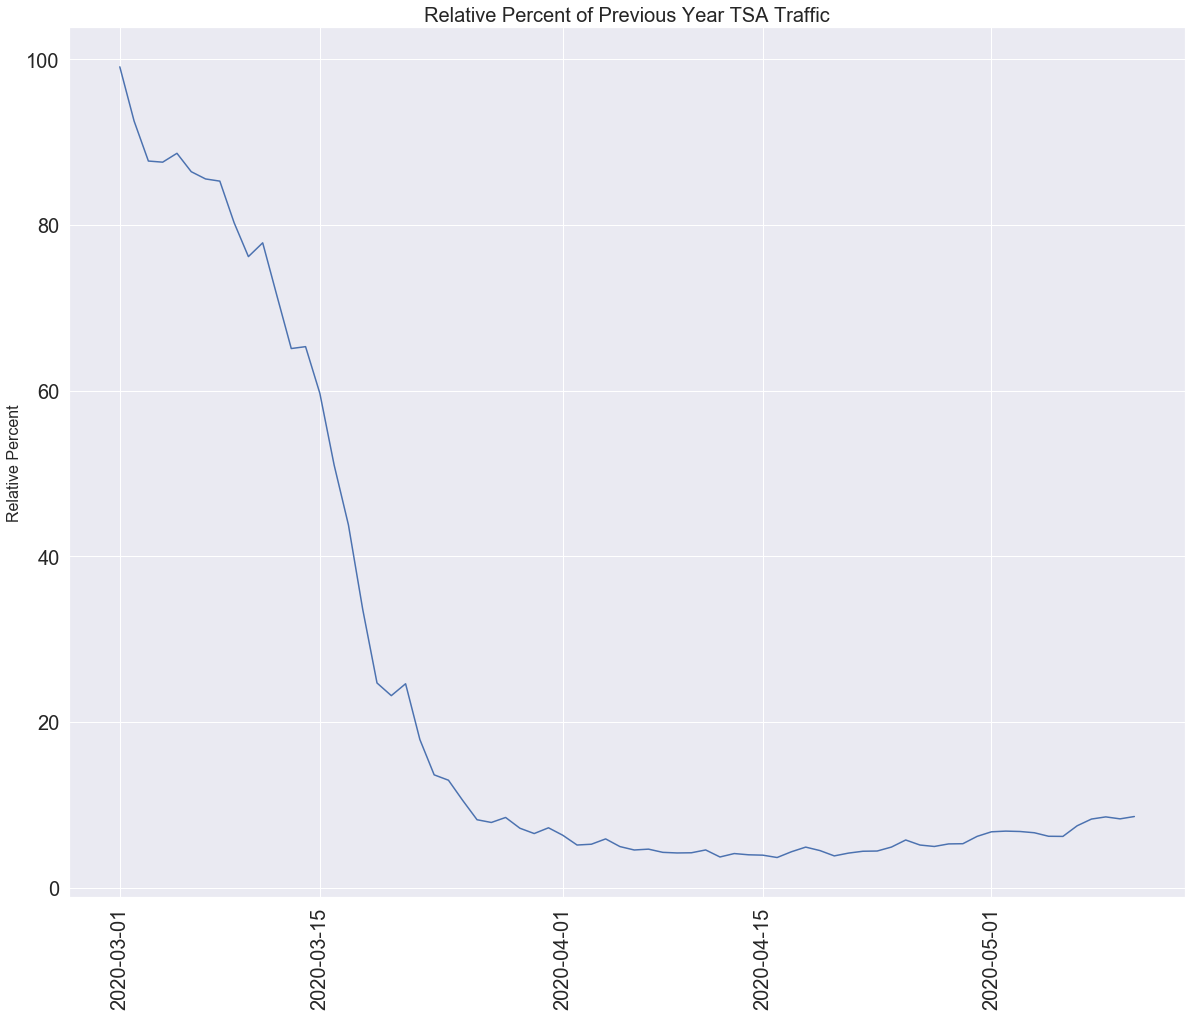

In [9]:
plt.figure(figsize=(20,16))
plt.plot(tsa['date'], tsa['yearly_relative_percent'])
plt.title('Relative Percent of Previous Year TSA Traffic', fontsize=20)
plt.ylabel('Relative Percent', fontsize=16)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

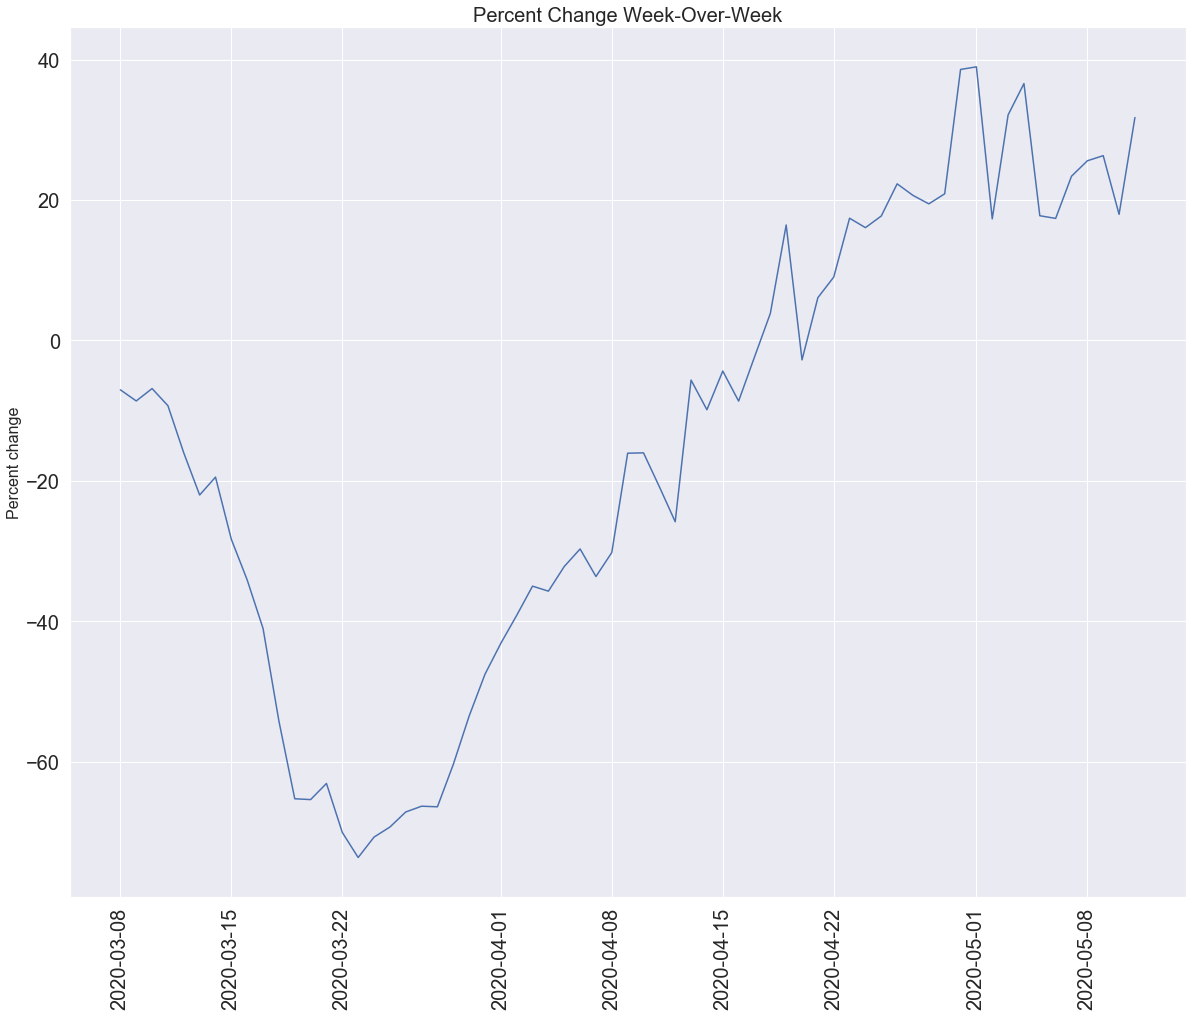

In [10]:
plt.figure(figsize=(20,16))
plt.plot(tsa['date'], tsa['weekly_percent_change'])
plt.title('Percent Change Week-Over-Week', fontsize=20)
plt.ylabel('Percent change', fontsize=16)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.show()